<a href="https://colab.research.google.com/github/rawatpranjal/AlgorithmicCollusion/blob/main/IPD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Iterated Prisioners' Dilemma**

- single state which is what the opponent did last period
- cooperation emerges

In [107]:
# Payoffs
T = 1.0  # temptation payoff
R = 0.9  # reward payoff
P = 0.1  # punishment payoff
S = 0  # sucker's payoff

reward = np.array([[P, T],
                  [S, R]])

reward[1,1],reward[1,0],reward[0,1],reward[0,0]

(0.9, 0.0, 1.0, 0.1)

In [108]:
import random
import numpy as np

# initialize parameters
gamma = 0.9
alpha = 0.1
initial_temperature = 10.0
temperature_decay = 0.9999
min_temperature = 0.0001
temperature = initial_temperature
initial_eps = 1.0
eps_decay = 0.9999
min_eps = 0.0001
eps = initial_eps

# define the Boltzmann action selection function
def boltzmann_action_selection(Q, state, temperature):
    # compute the modified probabilities of each action using the Boltzmann distribution
    max_Q = np.max(Q[state])
    logits = (Q[state] - max_Q) / temperature
    exp_logits = np.exp(logits)
    probs = exp_logits / np.sum(exp_logits)
    # select an action using the computed probabilities
    action = np.random.choice(range(len(probs)), p=probs)
    return action

# initialize the Q-table
num_states = 2
num_actions = 2
Q1 = np.ones((num_states, num_actions))
Q2 = np.ones((num_states, num_actions))
agent1_history = []
agent2_history = []

In [109]:
# run Boltzmann Q-learning for a fixed number of episodes
# initialize the state
state1 = 1
state2 = 1
num_episodes = 100000
for episode in range(num_episodes):

    # take the exploratory action
    if np.random.uniform()>eps:
        # select an action using Boltzmann action selection
        action1 = boltzmann_action_selection(Q1, state1,temperature)
    else:
        action1 = np.random.choice(range(num_actions))

    if np.random.uniform()>eps:
        # select an action using Boltzmann action selection
        action2 = boltzmann_action_selection(Q2, state2,temperature)
    else:
        action2 = np.random.choice(range(num_actions))

    # collect rewards
    reward1 = reward[action1,action2]
    reward2 = reward[action2,action1]

    # observe the next state
    next_state1 = action2
    next_state2 = action1

    # update the Q-value for the selected action in the current state
    Q1[state1][action1] =  (1-alpha)*Q1[state1][action1] + alpha * (reward1 + gamma * np.max(Q1[next_state1]))
    Q2[state2][action2] =  (1-alpha)*Q2[state2][action2] + alpha * (reward2 + gamma * np.max(Q2[next_state2]))

    # move to the next state
    state1 = next_state1
    state2 = next_state2

    # update temperature
    temperature = max(min_temperature, temperature * temperature_decay)
    eps = max(min_eps, eps * eps_decay)

    if episode%10000==0:
      print('\n',episode, temperature, eps)
      print(np.mean([boltzmann_action_selection(Q1, 1,temperature) for i in range(100)]), np.mean([boltzmann_action_selection(Q2, 1,temperature) for i in range(100)]))
      print(np.mean([boltzmann_action_selection(Q1, 0,temperature) for i in range(100)]), np.mean([boltzmann_action_selection(Q2, 0,temperature) for i in range(100)]))
      print(Q1)
      print(Q2)
    
    agent1_history.append(action1)
    agent2_history.append(action2)


 0 9.999 0.9999
0.5 0.44
0.49 0.5
[[1.   1.  ]
 [1.09 1.  ]]
[[1.   1.  ]
 [1.   0.99]]

 10000 3.6782426032832705 0.3678242603283259
0.56 0.55
0.46 0.42
[[5.57793725 5.22951702]
 [5.614626   5.58104954]]
[[5.41939559 5.27946491]
 [5.51576814 5.43194785]]

 20000 1.3530821730781113 0.13530821730781062
0.42 0.53
0.49 0.5
[[5.46420437 5.41917949]
 [5.48696664 5.35713033]]
[[5.43612529 5.33398786]
 [5.35533284 5.22703016]]

 30000 0.497746224098313 0.049774622409830716
0.3 0.4
0.44 0.45
[[5.14865386 5.01445685]
 [5.21092603 4.97166288]]
[[5.31865463 5.20186607]
 [5.3760323  5.15079082]]

 40000 0.1831014468548652 0.01831014468548625
0.35 0.56
0.38 0.51
[[4.53769476 4.45285004]
 [4.55686238 4.47404235]]
[[4.13131015 4.06277994]
 [4.36470941 4.39462074]]

 50000 0.06735588984342127 0.006735588984342076
0.0 1.0
1.0 0.0
[[4.14844429 4.98058604]
 [5.03093044 4.00876115]]
[[5.05657428 3.30199602]
 [4.34732442 4.95657295]]

 60000 0.024777608121224735 0.002477760812122453
1.0 1.0
1.0 0.0
[[1.27

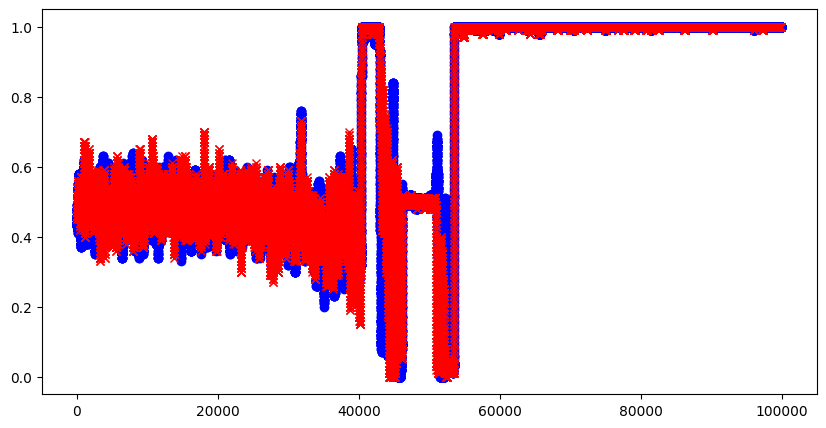

In [117]:
  import matplotlib.pyplot as plt
  plt.rcParams["figure.figsize"] = (10, 5)
  plt.rcParams['font.size']=10
  def moving_average(x, w):
        return np.convolve(x, np.ones(w), 'valid') / w
  plt.plot(moving_average(np.array(agent1_history),100), label = 'Agent 1 Actions', marker = 'o', c = 'b')
  plt.plot(moving_average(np.array(agent2_history),100), label = 'Agent 2 Actions', marker = 'x', c = 'r')
  #plt.title('Fraction of Co-operations in 100 games') 
  plt.show()

In [118]:
Q1

array([[1.27629669, 8.79256888],
       [8.1960725 , 9.        ]])

In [119]:
Q2

array([[7.9460811 , 1.07132217],
       [8.54572446, 9.        ]])